In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [2]:
K = int(math.pow(3,1))
L = int(math.pow(1,1))
d = int(K * L)
r= int(math.pow(10,0))
plt.rcParams['figure.dpi'] = 100

In [3]:
def c(x, p_a, p_b, theta_a, theta_b, s):

    c_matrix = np.zeros((d,1))

    #Mutation

    for i in range(K):
        for j in range(L):

            x_j_sum = 0
            for k in range(K):
                x_j_sum +=  x[j * K + k] * p_a[i * K + k]
                if i == k:
                    x_j_sum -= x[j * K + k]
                    
            x_i_sum = 0
            for l in range(L):
                x_i_sum +=  x[l * K + i] * p_b[j * L + l]
                if j == l:
                    x_i_sum -= x[l * K + i]

            c_matrix[j * K + i] += theta_a * 0.5 * x_j_sum + theta_b * 0.5 * x_i_sum

    return c_matrix
    #return np.zeros((d,1))

def a(x, phi, s):

    a_matrix = np.zeros((d,1))

    #Rekombination
    '''

    for i in range(K):
        for j in range(L):
            x_i_sum = 0
            for l in range(L):
                x_i_sum +=  x[l * K + i]
            x_j_sum = 0
            for k in range(K):
                x_j_sum +=  x[j * K + k]
            a_matrix[j * K + i] = phi[0] * (x_i_sum * x_j_sum - x[j * K + i])

    '''

    #Selektion

    
                             
    for i in range(d):
        for j in range(d):
            for k in range(d):

                if i == k:
                    
                    a_matrix[i] += 0.5 * x[i] * x[j] * (1 - x[k]) * s[j, k]

                else:
                    
                    a_matrix[i] += 0.5 * x[i] * x[j] * (-x[k]) * s[j, k]
    
    return a_matrix

def relu(x):
    return (np.maximum(0, x))

def kronecker_delta(i,j):
    if i == j:
        return 1
    return 0
    
def diff(x, c_value, phi, s, delta, noise_factor = math.pow(10,-3)):
    #normal_rand = np.random.multivariate_normal(np.zeros(d), np.identity(d) * math.sqrt(delta)) * noise_factor
    normal_rand = np.random.multivariate_normal(np.zeros(d), np.identity(d) * delta) * noise_factor
    normal_rand.reshape(d, 1)
    
    sigma = ((np.identity(d) - (np.diag(x[:,0]) @ np.ones((d,d)))) @ np.diag(np.sqrt(x)[:,0]))
    
    difference = (c_value * 1 + a(x, phi, s)) * delta + (sigma @ normal_rand).reshape(d, 1)
    #print('difference')
    #print(difference.shape)
    return x + difference, difference - c_value * delta


In [4]:
seed_variable = random.randint(0,1000)
#noted seeds: 814, 650
#seed_variable = 34
print('seed: ', seed_variable)
np.random.seed(seed_variable)
random.seed(seed_variable)

seed:  288


In [5]:
#Migration
m = math.pow(10,-1) * 4.9 * 0

In [6]:
#Mutation
theta_a = random.expovariate(1) * 0.1 * 0
theta_b = random.expovariate(1) * 0.1 * 0
print('theta_a', theta_a)
print('theta_b', theta_b)

theta_a 0.0
theta_b 0.0


In [7]:
'''
#Gleichverteile Übergangswahrscheinlichkeiten
p_a = np.zeros((K * K,1))
p_b = np.zeros((L * L,1))

for i in range(K):
    for j in range(K):
        p_a[i * K + j] = 1 / K
        
for i in range(L):
    for j in range(L):
        p_b[i * L + j] = 1 / L
'''
#zufällige Übergangswahrscheinlichkeiten
p_a = np.random.rand(K * K,1)
p_b = np.random.rand(L * L,1)

for j in range(K):
    sum_K = 0
    for i in range(K):
        if i == j: p_a[i * K + j] *= 10
        sum_K += p_a[i * K + j]
    for i in range(K):
        p_a[i * K + j] /= sum_K

for j in range(L):
    sum_L = 0
    for i in range(L):
        if i == j: p_b[i * L + j] *= 10
        sum_L += p_b[i * L + j]
    for i in range(L):
        p_b[i * L + j] /= sum_L

In [8]:
#Selektionsparameter
s = np.random.rand(d,d) * 10.1 * 1
s_k = np.random.rand(K) * 10.1 * 1
s_l = np.random.rand(L) * 10.1 * 1
row = -1
for i_1 in range(K):
    for j_1 in range(L):
        row += 1
        col = -1
        for i_2 in range(K):
            for j_2 in range(L):
                col += 1
                s[row][col] = s_k[i_1] + s_l[j_1] + s_k[i_2] + s_l[j_2]
'''
s = s + s.T #s soll symmetrisch sein
s[0][0] += 1
'''
s -= s[d-1][d-1]
#s /= s[0][0]
#print('Selektionsparameter: ', s)

In [9]:
#Rekombinationsrate
rand_param = (np.random.exponential(7,r) * 1.0 + 2.0 * 1) * 0
print('Rekombinationsrate: ', rand_param)

Rekombinationsrate:  [0.]


In [10]:
#Noise Faktor
noise_factor = math.pow(10,-3) * 100 * 0
print('Noise Faktor: ', noise_factor)

Noise Faktor:  0.0


In [11]:
seed_variable = random.randint(0,1000)
seed_variable = 643
print('seed: ', seed_variable)
np.random.seed(seed_variable)

x = np.random.rand(d,1)
x_2 = np.random.rand(d,1)
#print(x)
x /= x.sum()
x_2 /= x_2.sum()
#print(x)

plot_data = []
plot_data_2 = []
x_delta_data = []
x_2_delta_data = []
#c_data = []
#c_data_2 = []

seed:  643


In [12]:
def simulate(x, x_2, T = 1.5, t = 0, delta = math.pow(10,-4)):

    checkpoints = 1

    while t < T:

        if abs(t - T/(1 + checkpoints)) < delta:
            print('halfpoint')

        plot_data.append(x.tolist())

        c_value = c(x, p_a, p_b, theta_a, theta_b, s)
        x, x_delta = diff(x, c_value, rand_param, s, delta, noise_factor)

        # negative Werte von X auf 0 abbilden und Summe aller Werte von X auf 1 normalisieren
        x = relu(x)
        x /= x.sum()

        #plot_data.append(x.tolist())
        x_delta_data.append(x_delta.tolist())
        #c_data.append(c_value.tolist())

        #x_2
        if m > 0:

            c_value = c(x_2, p_a, p_b, theta_a, theta_b, s)
            x_2, x_2_delta = diff(x_2, c_value, rand_param, s, delta, noise_factor)

            # negative Werte von X auf 0 abbilden und Summe aller Werte von X auf 1 normalisieren
            x_2 = relu(x_2)
            x_2 /= x_2.sum()

            plot_data_2.append(x_2.tolist())
            x_2_delta_data.append(x_2_delta.tolist())
            #c_data_2.append(c_value.tolist())

            x = 0.5 * ((1 + math.pow(1 - 2 * m,delta)) * x + (1 - math.pow(1 - 2 * m,delta)) * x_2)
            x_2 = 0.5 * ((1 - math.pow(1 - 2 * m,delta)) * x + (1 + math.pow(1 - 2 * m,delta)) * x_2)
        
        t += delta


    print('simulation done')

    print('estimating parameters')

    mat_dim = (int)(d * (d+1) * 0.5)
    print('mat_dim: ', mat_dim)

    Y = np.zeros((mat_dim, 1))
    I = np.zeros((mat_dim, mat_dim))

    plot_data_rho = []
    plot_data_I = []
    plot_data_linkage_disequilibrium = []

    c_value = np.random.rand(d,1)

    for t in range((len(plot_data) - 1)):

        x_t = plot_data[t]

        if t == 0:
            t = 1

        x_diff = 0

        for i in range(d):

            x_diff += x_delta_data[t][i][0]

        k_index = -1

        for k_1 in range(d):

            for k_2 in range(k_1 + 1):

                k_index += 1

                for i in range(d):

                    Y[k_index] += 0.5 * x_t[k_1][0] * (kronecker_delta(k_2, i) * x_t[k_2][0] - x_t[k_2][0]) * x_delta_data[t][i][0]

                l_index = -1

                for l_1 in range(d):

                    for l_2 in range(l_1 + 1):

                        l_index += 1

                        I[k_index][l_index] += 0.25 * (x_t[k_1][0] * x_t[l_1][0]) * (x_t[k_2][0] * kronecker_delta(k_2, l_2) - x_t[k_2][0] * x_t[l_2][0])

                        #print('k_1', k_1)
                        #print('k_2', k_2)
                        #print('l_1', l_1)
                        #print('l_2', l_2)
                        #print('k_index', k_index)
                        #print('l_index', l_index)
                        #print('I[k_index][l_index]',I[k_index][l_index])


    I = I[:-1,:-1]
    Y = Y[:-1]
    print('I:')
    print(I)
    #print('Y:')
    #print(Y)

    I *= delta
    det_I = np.linalg.det(I)
    print('det(I) = ', det_I)
    print('rank(I) = ', np.linalg.matrix_rank(I))

    if det_I != 0:

        inv_I = np.linalg.inv(I)
            
        rho = inv_I @ Y

        #rho = np.reshape(rho,(mat_dim,mat_dim))

        print('estimation done')

        print(s)
        print(rho)

        #print(s - rho)
        #print(np.max(s - rho))

    print('x')
    plot_data_1_2 = np.array(plot_data).T
    plt.plot(plot_data_1_2[0].T)
    plt.show()

    '''
    if m > 0:
        print('x_2')
        plot_data_2_2 = np.array(plot_data_2).T
        plt.plot(plot_data_2_2[0].T)
        plt.show()

    print('D - linkage disequilibrium')
    plot_data_linkage_disequilibrium_2 = np.array(plot_data_linkage_disequilibrium).T
    plt.plot(plot_data_linkage_disequilibrium, label='D')
    plt.yscale('log')
    plt.show()
    print('rho - absoulte error to true value')
    plt.plot(plot_data_rho, label='rho')
    plt.yscale('log')
    plt.show()
    print('I - information')
    plt.plot(plot_data_I, label='I')
    plt.show()
    '''

    return x, x_2, I

halfpoint
halfpoint
simulation done
estimating parameters
mat_dim:  6
I:
[[ 1.54634554e+00  1.08907714e+00 -2.34222846e-01  3.98354466e+00
  -8.54854290e-01]
 [ 1.08907714e+00  1.33415478e+00 -3.04806249e-01  4.54502180e+00
  -1.02934853e+00]
 [-2.34222846e-01 -3.04806249e-01  3.48778319e+02 -1.02934853e+00
   1.89357926e+02]
 [ 3.98354466e+00  4.54502180e+00 -1.02934853e+00  1.56407350e+01
  -3.51567327e+00]
 [-8.54854290e-01 -1.02934853e+00  1.89357926e+02 -3.51567327e+00
   2.09332457e+02]]
det(I) =  1.4136724562644805e-12
rank(I) =  5
estimation done
[[-9.10302854 -4.17175255 -4.55151427]
 [-4.17175255  0.75952344  0.37976172]
 [-4.55151427  0.37976172  0.        ]]
[[-4.62453179]
 [ 0.19216715]
 [ 0.37745315]
 [-0.03181031]
 [ 0.00599482]]
x


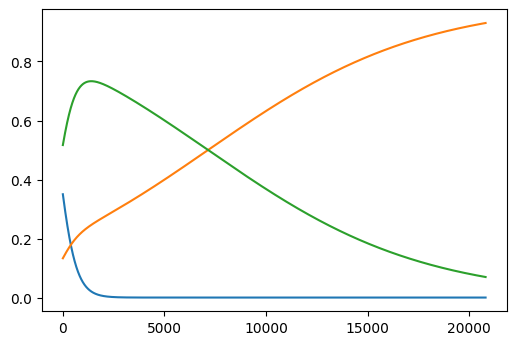

In [16]:
x, x_2, I = simulate(x, x_2, T = 10.2, t = 0, delta = math.pow(10,-3))